## 연속 변수의 요약통계 생성
- describe(): 중심 경향, 퍼짐 정도, 왜도 -> 이상값과 예상치 못한 값 식별에 도움
- 히스토그램: 변수의 분포 시각화

> 특정 변수가 어떻게 분포하는지 이해하는 것이 필수적

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

covidtotals=pd.read_csv('C:/data-cleansing-main/Chapter03/data/covidtotals.csv',parse_dates=['lastdate'])
covidtotals.set_index('iso_code',inplace=True)

In [3]:
covidtotals.sample(2,random_state=1).T      # 랜덤으로 2개의 값을 뽑아서 전치해서 보여줌

iso_code,COG,THA
lastdate,2020-06-01 00:00:00,2020-06-01 00:00:00
location,Congo,Thailand
total_cases,611,3081
total_deaths,20,57
total_cases_pm,110.727,44.14
total_deaths_pm,3.624,0.817
population,5518092.0,69799978.0
pop_density,15.405,135.132
median_age,19.0,40.1
gdp_per_capita,4881.406,16277.671


In [4]:
covidtotals.dtypes

lastdate           datetime64[ns]
location                   object
total_cases                 int64
total_deaths                int64
total_cases_pm            float64
total_deaths_pm           float64
population                float64
pop_density               float64
median_age                float64
gdp_per_capita            float64
hosp_beds                 float64
dtype: object

In [5]:
covidtotals.describe()      # 평균과 중앙값의 차이가 매우 크다면 좋지 않은 신호. 상단에 이상값이 있다는 뜻!!

,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
count,2.100000e+02,210.000000,209.000000,209.000000,2.100000e+02,198.000000,186.000000,182.000000,164.000000
mean,2.921614e+04,1770.714286,1361.842909,55.925440,3.694276e+07,362.867434,30.627957,19539.154588,3.012671
std,1.363978e+05,8705.565857,2629.894101,145.081876,1.425092e+08,1581.438294,9.133152,19862.354091,2.464917
min,0.000000e+00,0.000000,0.894000,0.000000,8.090000e+02,0.137000,15.100000,661.240000,0.100000
25%,1.757500e+02,4.000000,96.785000,0.893000,1.031042e+06,37.416000,22.250000,4485.329000,1.300000
50%,1.242500e+03,25.500000,281.997000,6.214000,6.909866e+06,87.250000,30.250000,13183.081500,2.358500
75%,1.011700e+04,241.250000,1803.318000,32.158000,2.615868e+07,214.122000,39.000000,28556.527250,3.895750
max,1.790191e+06,104383.000000,19771.348000,1237.551000,1.439324e+09,19347.500000,48.200000,116935.600000,13.800000


In [9]:
# 확진자 수와 사망자 수 관련 열들의 값의 분포 살펴보기
totvars = ['location','total_cases','total_deaths','total_cases_pm','total_deaths_pm']
covidtotals[totvars].quantile(np.arange(0.0,1.1,0.1))        # 0 부터 1.0까지 0.1씩 증가하는 리스트 생성

C:\Users\victo\AppData\Local\Temp\ipykernel_23372\634019075.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covidtotals[totvars].quantile(np.arange(0.0,1.1,0.1))        # 0 부터 1.0까지 0.1씩 증가하는 리스트 생성


,total_cases,total_deaths,total_cases_pm,total_deaths_pm
0.0,0.0,0.0,0.8940,0.0000
0.1,22.9,0.0,18.4870,0.0000
0.2,105.2,2.0,56.7386,0.4008
0.3,302.0,6.7,118.2282,1.7348
0.4,762.0,12.0,214.9182,3.9734
0.5,1242.5,25.5,281.9970,6.2140
0.6,2514.6,54.6,546.0534,12.5644
0.7,6959.8,137.2,1074.0324,26.0638
0.8,16847.2,323.2,2208.7374,50.2896
0.9,46513.1,1616.9,3771.9956,139.5290


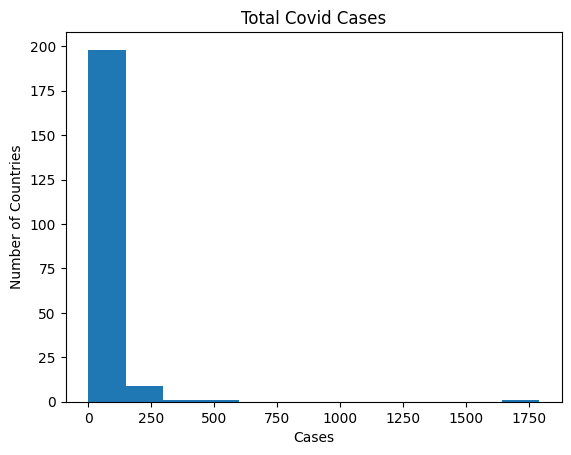

In [10]:
# 총 확진자 수의 분포를 시각화
plt.hist(covidtotals['total_cases']/1000,bins=12)       # 왜 1000으로 나눈거지? bins는 뭐지?
plt.title('Total Covid Cases')
plt.xlabel('Cases')
plt.ylabel('Number of Countries')
plt.show()

## 정리
1. describe()에서 다양한 정보를 얻을 수 있음.
    - 평균과 중앙값의 차이가 크다면, 이상값이 있는 확률이 높음
    - 백분위수 간의 차이를 통해 정규분포를 따르는지, 따르지 않는지 확인 가능